## 模拟集成学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

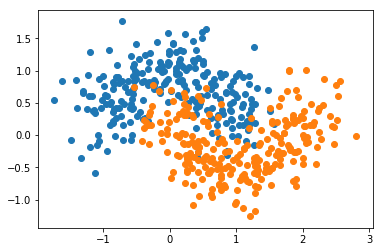

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(solver='lbfgs')
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.864

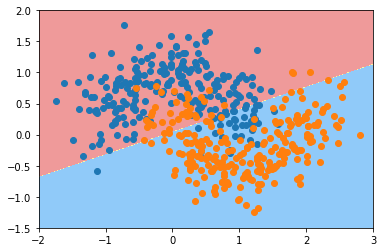

In [6]:
plot_decision_boundary(log_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):              #采用管道将步骤进行封装
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),   #添加多项式项
        ('std_scaler', StandardScaler()),              #数据归一化
        ('logistic', LogisticRegression(solver='lbfgs'))             #训练逻辑回归模型
    ])

In [8]:
poly_log_clf = PolynomialLogisticRegression(5)
poly_log_clf.fit(X_train, y_train)
poly_log_clf.score(X_test, y_test)

0.88

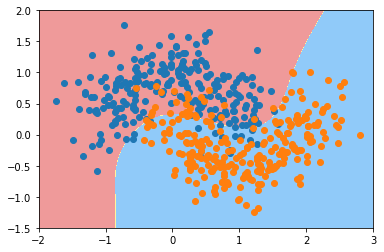

In [9]:
plot_decision_boundary(poly_log_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.912

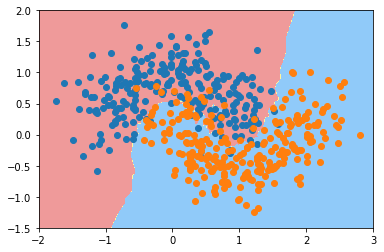

In [11]:
plot_decision_boundary(knn_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [12]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.896

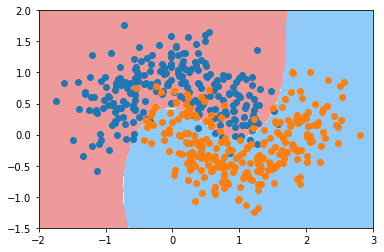

In [13]:
plot_decision_boundary(svm_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf=10)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.904

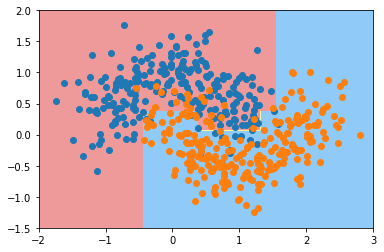

In [15]:
plot_decision_boundary(dt_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [16]:
x = np.arange(5)
y = [log_clf.score(X_test, y_test), poly_log_clf.score(X_test, y_test), 
     knn_clf.score(X_test, y_test), svm_clf.score(X_test, y_test), dt_clf.score(X_test, y_test)]

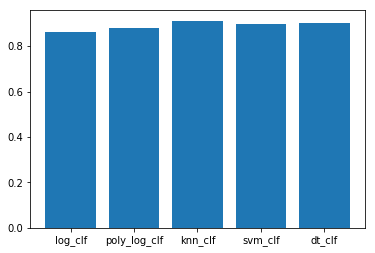

In [17]:
plt.bar(x, y)
x_label = ['log_clf', 'poly_log_clf', 'knn_clf', 'svm_clf', 'dt_clf']
plt.xticks(x, x_label)
plt.show()

In [18]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = poly_log_clf.predict(X_test)
y_predict3 = knn_clf.predict(X_test)
y_predict4 = svm_clf.predict(X_test)
y_predict5 = dt_clf.predict(X_test)

In [19]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3 + y_predict4 + y_predict5) >= 3, dtype='int')
y_predict[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.904

### Hard Voting Classifier
    每个模型投票权重一样，少服从多

In [21]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression(solver='lbfgs')),
    ("poly_log_clf", PolynomialLogisticRegression(5)),
    ("knn_clf", KNeighborsClassifier()),
    ("svm_clf", SVC(gamma='scale')),
    ("dt_clf", DecisionTreeClassifier(min_samples_leaf=10))
], voting='hard')    

In [22]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('poly_lo...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [23]:
voting_clf.score(X_test, y_test)

0.904

### Soft Voting Classifier
    不同算法应该区分不同的权重，某个算法的预测准确，就该分配高权重。这就是soft voting的思想
    soft voting要求算法都能够得到一个概率值，也就是说在soft voting中，模型都必须基于概率 

In [24]:
voting_clf2 = VotingClassifier(estimators=[
    ("log_clf", LogisticRegression(solver='lbfgs')),
    ("poly_log_clf", PolynomialLogisticRegression(5)),
    ("knn_clf", KNeighborsClassifier()),
    ("svm_clf", SVC(gamma='scale', probability=True)),   #probability使得svc能计算概率值
    ("dt_clf", DecisionTreeClassifier(min_samples_leaf=10))
], voting='soft')    

In [25]:
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('poly_lo...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [26]:
voting_clf2.score(X_test, y_test)

0.912

## Bagging 和 Pasting

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm.plot_decision_boundary import plot_decision_boundary

In [157]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X = X + np.random.normal(0, 1, size=X.shape)   # 添加噪音
y = iris.target

In [141]:
X.shape, y.shape

((150, 4), (150,))

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 使用Bagging 有放回抽样(bootstrap)
     首选决策树,决策树非参数学习更能产生出不一样的子模型

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# n_estimators指定子模型个数，max_sample指定每次训练传入的样本个数
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                                max_samples=100, bootstrap=True)  

In [154]:
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.7894736842105263

In [156]:
# 理论上来说，子模型越多，最终准确率越高
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, 
                                max_samples=100, bootstrap=True)  
bagging_clf2.fit(X_train, y_train)
bagging_clf2.score(X_test, y_test)

0.8157894736842105

### 使用OOB 做测试/验证
     不需要人为将原始数据分为训练/测试集

In [158]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X = X + np.random.normal(0, 1, size=X.shape)   # 添加噪音
y = iris.target

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)

In [165]:
bagging_clf.fit(X, y)
bagging_clf.oob_score_

0.7933333333333333

### n_jobs 并行处理
     因为每个子模型都是独立的，可以并行处理优化速度

In [170]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

CPU times: user 367 ms, sys: 2.49 ms, total: 370 ms
Wall time: 370 ms


In [171]:
%%time
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True, n_jobs=-1)
bagging_clf2.fit(X, y)

CPU times: user 97.2 ms, sys: 4.7 ms, total: 102 ms
Wall time: 201 ms


### bootstrap_features 针对特征取样
     在样本特征足够多，可以针对特征进行随机采样，称为random subspaces，既针对样本，又针对特征进行随机采样的方式称为random patches

In [181]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True, n_jobs=-1,
                               max_features=2, bootstrap_features=True)   #有放回特征取样，每个基模型只用2个特征
bagging_clf.fit(X, y)
bagging_clf.oob_score_

0.7466666666666667

## RandomForest 随机森林

In [183]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X = X + np.random.normal(0, 1, size=X.shape)   # 添加噪音
y = iris.target

In [188]:
#  随机森林拥有决策树和BaggingClassifier的所有参数
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, random_state=666, oob_score=True, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [189]:
rf_clf.oob_score_

0.7533333333333333

In [193]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, oob_score=True, n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.78

### Extra—Trees   极其随机
     决策树在节点划分上，使用随机的特征和随机得到阈值。训练速度更快，抑制了过拟合，但增大了偏差。

In [198]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, n_jobs=-1, random_state=666)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=666, verbose=0, warm_start=False)

In [199]:
et_clf.oob_score_

0.76

### Bagging 解决回归问题

In [200]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
    每个模型都在尝试增强整体的模型效果，而不是彼此独立的

In [201]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X = X + np.random.normal(0, 1, size=X.shape)   # 添加噪音
y = iris.target

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### AdaBoosting

In [205]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

In [206]:
ada_clf.score(X_test, y_test)

0.7105263157894737

### Gradient Boosting

In [223]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=50)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [224]:
gb_clf.score(X_test, y_test)

0.7105263157894737

### Boosting 解决回归问题

In [225]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor